In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import davies_bouldin_score
from sklearn import cluster
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans

In [27]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [28]:
Km_data = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\kmean_Data.csv')\
.set_index("customer_unique_id")

In [29]:
clean_dataset(Km_data)

,total_spend,review_id,mean_review,total_nb_sellers,erreur_estimation_livraison,temps_commande_livraison,buy_freq
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,5.0,1.0,99.189722,153.869444,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,4.0,1.0,101.955000,78.854167,0.0
0000f46a3911fa3c0805444483337064,69.00,1.0,3.0,1.0,33.353611,617.562222,0.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,4.0,1.0,266.615278,480.890000,0.0
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,5.0,1.0,168.851111,315.387222,0.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1.0,5.0,1.0,638.633333,660.356667,0.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,4.0,1.0,49.527778,722.340000,0.0
ffff371b4d645b6ecea244b27531430a,89.90,1.0,5.0,1.0,707.248889,356.930000,0.0


In [30]:
Km_data_sc = preprocessing.scale(Km_data)
res = cluster.KMeans(n_clusters=4)
res.fit(Km_data_sc)

KMeans(n_clusters=4)

In [31]:
res.predict(Km_data_sc)
res.labels_
np.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([70412,  2162,  5645, 14534], dtype=int64))

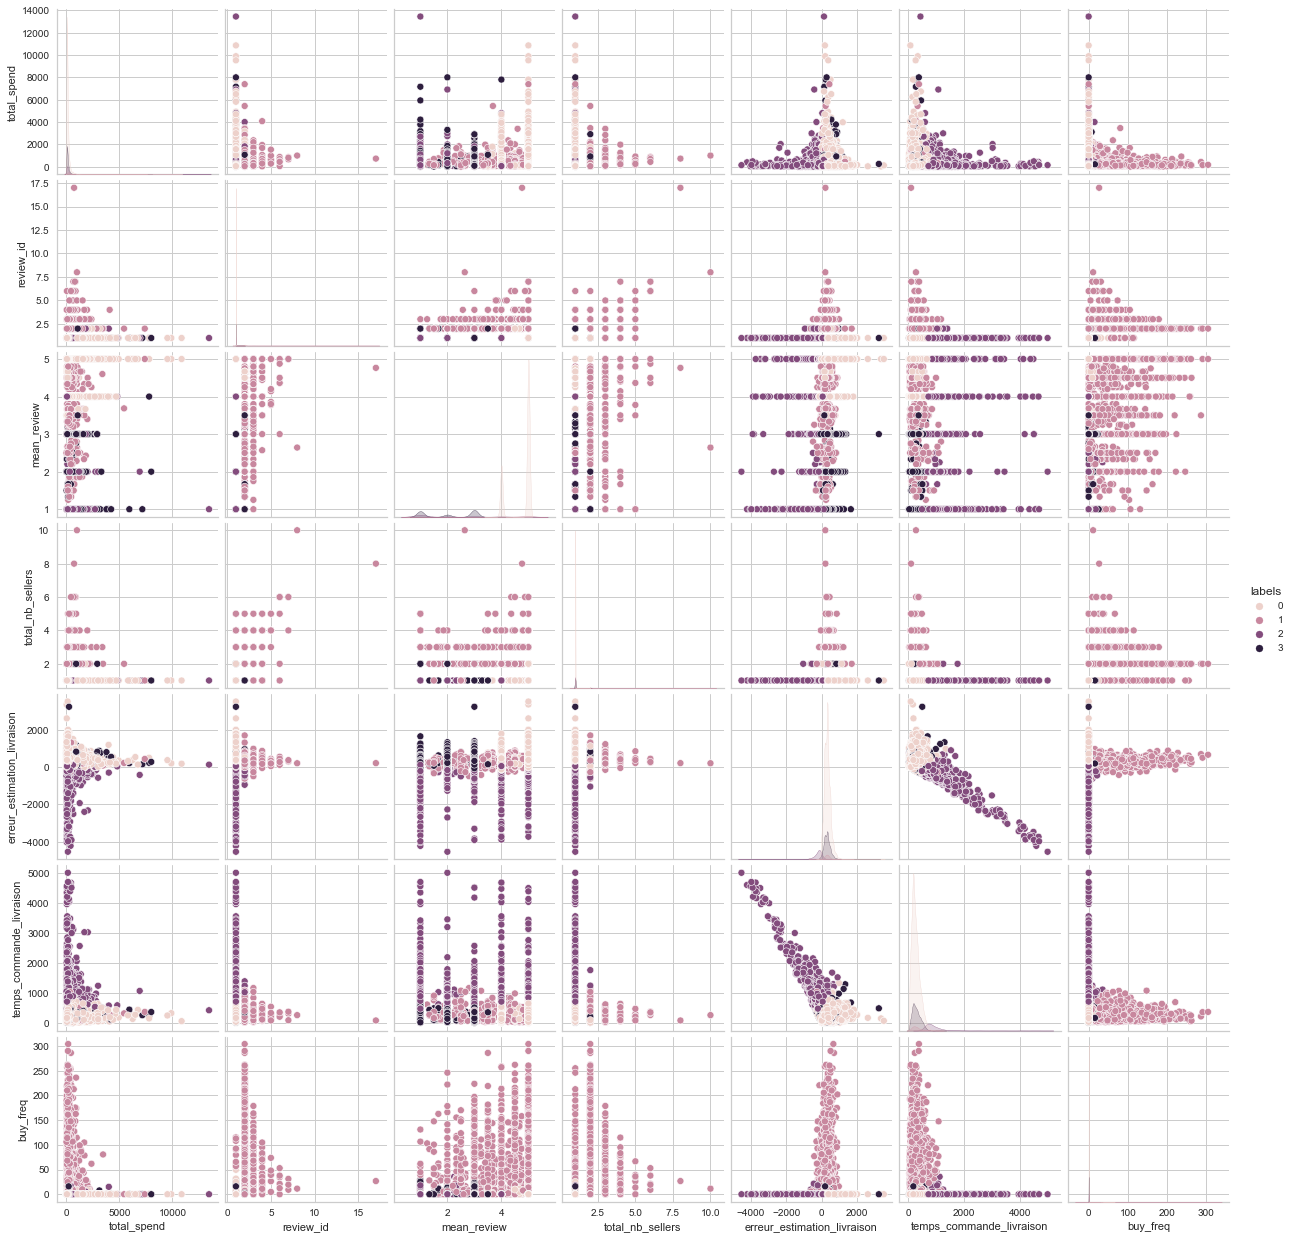

In [32]:
# Rajouter la variable au data-frame initial
Km_data_c = Km_data.copy()
Km_data_c['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(Km_data_c,hue="labels")

In [33]:
# Moyennes par groupe
gb_km = Km_data.groupby(res.labels_)
# Éffectifs par classe
gb_km.size()

0    70412
1     2162
2     5645
3    14534
dtype: int64

In [34]:
n_f = list(Km_data.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

['total_spend',
 'review_id',
 'mean_review',
 'total_nb_sellers',
 'erreur_estimation_livraison',
 'temps_commande_livraison',
 'buy_freq']

In [37]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

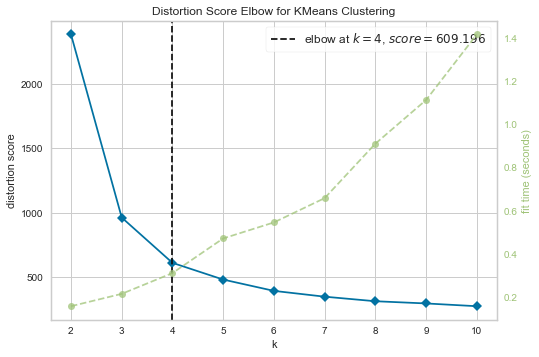

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(Km_data)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

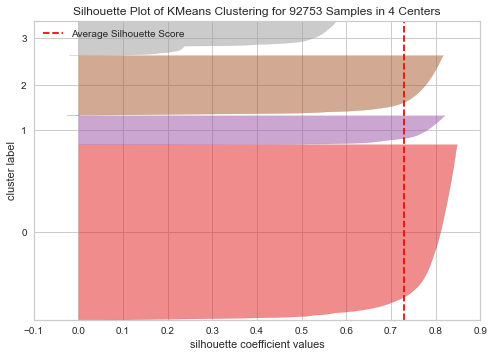

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92753 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(Km_data)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [45]:
davies_bouldin_score(Km_data, res.labels_)

8.554714420206992